In [10]:
import os,sys
from pmtool.ToolBox import ToolBox
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

%matplotlib inline

In [11]:
parameters = {'data_path': r'E:\Internship Mass storage\First 3 datasets\Ricord-1a chest only\Second run', # path to your DICOM data
              'data_type': 'dcm', # original data format: DICOM
              'multi_rts_per_pat': False,
             'image_only' : True}   #needed to add image only because no mask in the original folder


data_dcms = ToolBox(**parameters)

100%|██████████| 9/9 [00:00<00:00, 231.20it/s]


In [4]:
dataset_description = data_dcms.get_dataset_description() 
dataset_description.head(10)

Patients processed: 100%|██████████| 9/9 [00:15<00:00,  1.69s/it]


,Modality,SliceThickness,PixelSpacing,SeriesDate,Manufacturer,patient,slice#
0,CT,1.25,"[0.740234, 0.740234]",20061205,NaN,2.000000-CHEST WITHOUT CONTRAST-83326-000421,0
1,CT,1.25,"[0.740234, 0.740234]",20061205,NaN,2.000000-CHEST WITHOUT CONTRAST-83326-000421,1
2,CT,1.25,"[0.740234, 0.740234]",20061205,NaN,2.000000-CHEST WITHOUT CONTRAST-83326-000421,2
3,CT,1.25,"[0.740234, 0.740234]",20061205,NaN,2.000000-CHEST WITHOUT CONTRAST-83326-000421,3
4,CT,1.25,"[0.740234, 0.740234]",20061205,NaN,2.000000-CHEST WITHOUT CONTRAST-83326-000421,4
5,CT,1.25,"[0.740234, 0.740234]",20061205,NaN,2.000000-CHEST WITHOUT CONTRAST-83326-000421,5
6,CT,1.25,"[0.740234, 0.740234]",20061205,NaN,2.000000-CHEST WITHOUT CONTRAST-83326-000421,6
7,CT,1.25,"[0.740234, 0.740234]",20061205,NaN,2.000000-CHEST WITHOUT CONTRAST-83326-000421,7
8,CT,1.25,"[0.740234, 0.740234]",20061205,NaN,2.000000-CHEST WITHOUT CONTRAST-83326-000421,8
9,CT,1.25,"[0.740234, 0.740234]",20061205,NaN,2.000000-CHEST WITHOUT CONTRAST-83326-000421,9


In [5]:
print('Unique modalities found: ', np.unique(dataset_description.Modality.values)[0])

Unique modalities found:  CT


In [6]:
CT_dcms = ToolBox(**parameters)
dataset_description = CT_dcms.get_dataset_description('CT') 
dataset_description.head(10)

Patients processed: 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]


,PatientName,ConvolutionKernel,SliceThickness,PixelSpacing,KVP,Exposure,XRayTubeCurrent,SeriesDate,patient,slice#
0,"(M, I, D, R, C, -, R, I, C, O, R, D, -, 1, A, ...",STANDARD,1.25,"[0.740234, 0.740234]",120.0,2,486,20061205,2.000000-CHEST WITHOUT CONTRAST-83326-000421,0
1,"(M, I, D, R, C, -, R, I, C, O, R, D, -, 1, A, ...",STANDARD,1.25,"[0.740234, 0.740234]",120.0,2,486,20061205,2.000000-CHEST WITHOUT CONTRAST-83326-000421,1
2,"(M, I, D, R, C, -, R, I, C, O, R, D, -, 1, A, ...",STANDARD,1.25,"[0.740234, 0.740234]",120.0,2,486,20061205,2.000000-CHEST WITHOUT CONTRAST-83326-000421,2
3,"(M, I, D, R, C, -, R, I, C, O, R, D, -, 1, A, ...",STANDARD,1.25,"[0.740234, 0.740234]",120.0,2,486,20061205,2.000000-CHEST WITHOUT CONTRAST-83326-000421,3
4,"(M, I, D, R, C, -, R, I, C, O, R, D, -, 1, A, ...",STANDARD,1.25,"[0.740234, 0.740234]",120.0,2,486,20061205,2.000000-CHEST WITHOUT CONTRAST-83326-000421,4
5,"(M, I, D, R, C, -, R, I, C, O, R, D, -, 1, A, ...",STANDARD,1.25,"[0.740234, 0.740234]",120.0,2,486,20061205,2.000000-CHEST WITHOUT CONTRAST-83326-000421,5
6,"(M, I, D, R, C, -, R, I, C, O, R, D, -, 1, A, ...",STANDARD,1.25,"[0.740234, 0.740234]",120.0,2,486,20061205,2.000000-CHEST WITHOUT CONTRAST-83326-000421,6
7,"(M, I, D, R, C, -, R, I, C, O, R, D, -, 1, A, ...",STANDARD,1.25,"[0.740234, 0.740234]",120.0,2,486,20061205,2.000000-CHEST WITHOUT CONTRAST-83326-000421,7
8,"(M, I, D, R, C, -, R, I, C, O, R, D, -, 1, A, ...",STANDARD,1.25,"[0.740234, 0.740234]",120.0,2,486,20061205,2.000000-CHEST WITHOUT CONTRAST-83326-000421,8
9,"(M, I, D, R, C, -, R, I, C, O, R, D, -, 1, A, ...",STANDARD,1.25,"[0.740234, 0.740234]",120.0,2,486,20061205,2.000000-CHEST WITHOUT CONTRAST-83326-000421,9


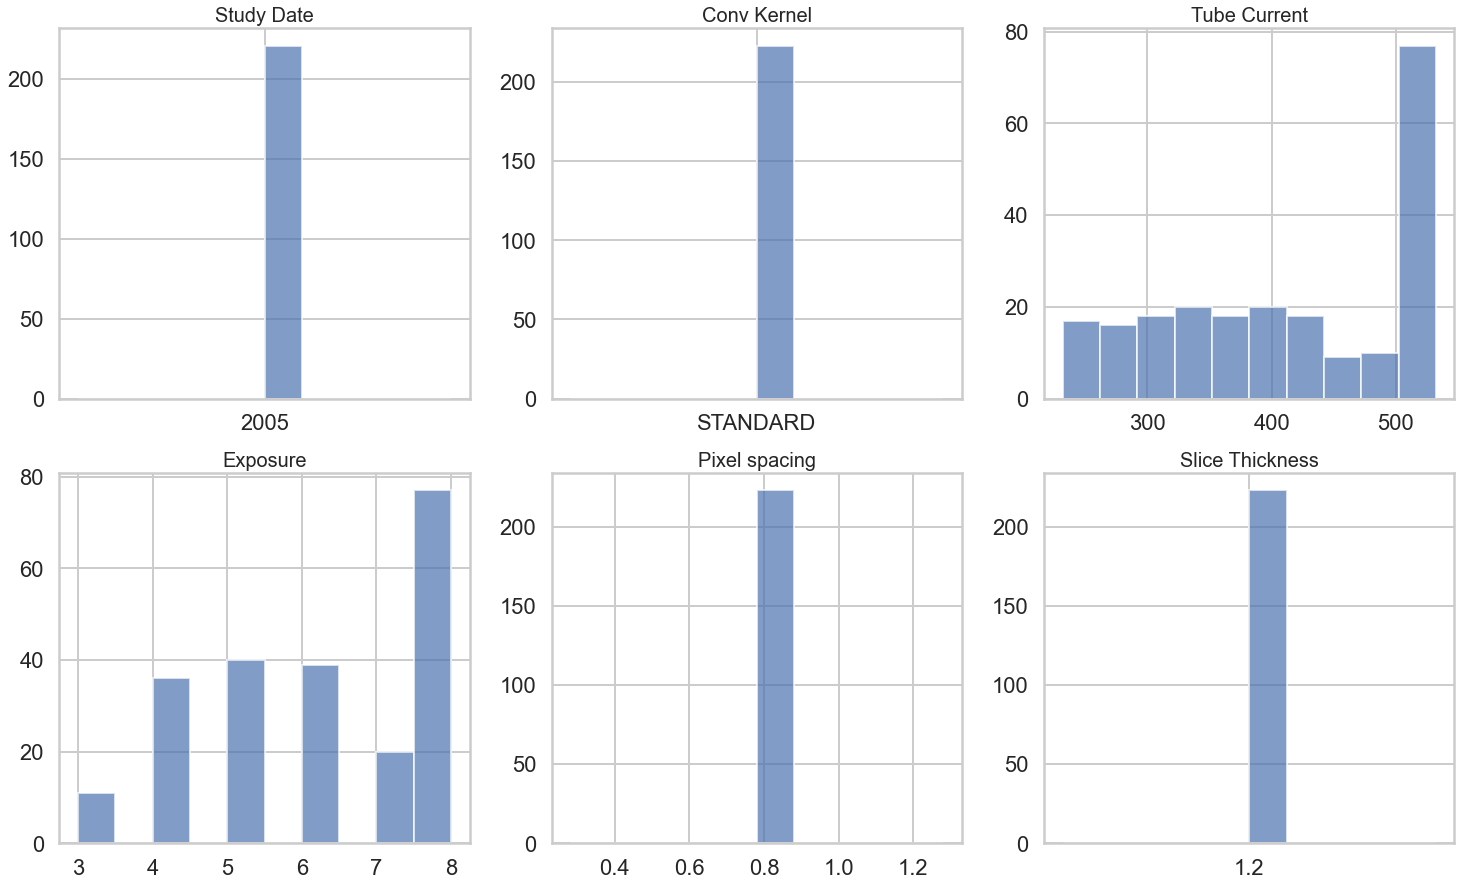

In [6]:
sb.set(context='poster', style='whitegrid')

study_date = sorted([ 'Nan' if x=='' or x=='NaN' else str(x[0:4]) for x in list(dataset_description['SeriesDate'])])[2:]
conv_kernel =['Nan' if x=='' or x=='NaN' else x for x in list(dataset_description['ConvolutionKernel'])]
tube_current =[-1 if x=='' or x=='NaN' else x for x in list(dataset_description['XRayTubeCurrent'])]
exposure =[-1 if x=='' or x=='NaN' else x for x in list(dataset_description['Exposure'])]
ps = sorted([(x[0]) for x in list(filter(lambda x: x != 'NaN', dataset_description['PixelSpacing'].values))])
sl_th = sorted([str(x)[0:3] for x in list(filter(lambda x: x != 'NaN', dataset_description['SliceThickness'].values))])
figures,descriptions = [study_date,conv_kernel,tube_current,exposure,ps,sl_th],['Study Date','Conv Kernel','Tube Current','Exposure','Pixel spacing','Slice Thickness']

fig,ax = plt.subplots(2,3,figsize=(25,15))
for i in range(2):
    for j in range(3):
        ax[i,j].hist(figures.pop(0),alpha=0.7)
        ax[i,j].set_title(descriptions.pop(0),fontsize=20)

In [7]:
qc_params = {'specific_modality': 'CT', # target modality: CT
            'thickness_range': [1,2], # slice thickness should be in range of 2..5 mm (changed to 1-2 for this set)
            'spacing_range': [0.5,1.25], # pixel spacing should be in range of 0.5..1.25 mm
            'scan_length_range': [5,170], # scan should contain from 5 to 170 slices
            'axial_res': [512,512], # the axial resolution should be 512x512
            'kernels_list': ['standard','lung','b19f']} # the following kernels are acceptable

In [8]:
qc_dataframe = CT_dcms.get_quality_checks(qc_params)

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\MegaMert\Documents\GitHub\precision-medicine-toolbox\ToolBoxTest.py:580: UserWarning: Problems occured with rescaling intensities
  warn('Problems occured with rescaling intensities')
100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Cannot perform Intercept/slope and image shape check for pat: 302.000000-chest-13428-001596


In [9]:
qc_dataframe

,Patient id,Modality is acceptable,Projection is axial,Complete scan (no missing/overlapping slices),Scan len is in range,Slice thickness is in range,Slice thickness is consistent,Pixel spacing is in range,Convolutional kernel tag is present,Convolutional kernel is acceptable,Axial pr. resolution is acceptable,Intensity intercept/slope tags are present
0,302.000000-chest-13428-001596,1,1,0,0,1,1,1,1,1,NaN,NaN


In [12]:
export_path = r'E:\Internship Mass storage\First 3 datasets\Ricord-1a chest only\Converted second run'
region_of_interest = 'all'
data_ct = ToolBox(**parameters) 


100%|██████████| 9/9 [00:00<00:00, 231.20it/s]


In [13]:
data_ct.convert_to_nrrd(export_path)

Patients converted:   0%|          | 0/9 [00:00<?, ?it/s]C:\Users\MegaMert\Documents\GitHub\precision-medicine-toolbox\pmtool\ToolBox.py:567: UserWarning: Problems occured with rescaling intensities
  warn('Problems occured with rescaling intensities')
Patients converted:   0%|          | 0/9 [00:00<?, ?it/s]


ValueError: The length of the pixel data in the dataset (204444 bytes) doesn't match the expected length (524288 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.

In [ ]:
data_ct_nrrd = ToolBox(data_path = r'E:\Internship Mass storage\First 3 datasets\Ricord-1a chest only\Converted second run\Test', data_type='nrrd')


In [ ]:
data_ct_nrrd.get_jpegs(r'E:\Internship Mass storage\First 3 datasets\Ricord-1a chest only\Converted second run') # the function will create 'images_quick_check' folder in the specified directory 

In [ ]:
from ipywidgets import interact
import numpy as np
from PIL import Image

def browse_images(images,names):
    n = len(images)
    def view_image(i):
        plt.figure(figsize=(20,10))
        plt.imshow(images[i])#, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Slice: %s' % names[i])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))

for pat,_ in data_ct_nrrd:
    _,file_struct = [*os.walk(os.path.join(r'E:\Internship Mass storage\First 3 datasets\Ricord-1a chest only\Converted second run\images_quick_check',pat))]
    root,images = file_struct[0],file_struct[2]
    imgs =[np.array(Image.open(os.path.join(root,img))) for img in images]
    print(pat)
    browse_images(imgs,images)
    break

In [ ]:
parameters = r"C:\Users\MegaMert\Documents\GitHub\precision-medicine-toolbox\examples\example_ct_parameters.yaml"
features = data_ct_nrrd.extract_features(parameters, loggenabled=True)

In [ ]:
sb.set(context='poster', style='white')
data_ct_nrrd.pre_process(ref_img_path = r'E:\Internship Mass storage\First 3 datasets\Ricord-1a chest only\Converted second run\converted_nrrds\LUNG1-001_1-1\image.nrrd',
                         save_path = r'E:\Internship Mass storage\First 3 datasets\Ricord-1a chest only\Converted second run\Preprocessed',
                         hist_match = False,        # boolean
                         subcateneus_fat = False,   # boolean
                         fat_value = 774,           # this is a dummy value, 
                                                    # you would need to find that value for each image
                         percentile_scaling = False, # boolean
                         window_filtering_params = (1500,-600), #Window Filtering [WW,WL]
                         binning = 255,             # this is a dummy value, it takes False or int 
                                                    # (# of bins for intensity resampling)
                         verbosity = True,          # boolean
                         z_score = True,           # boolean 
                         hist_equalize = True,     # boolean
                         norm_coeff = (1000.,500.), # these are dummy values, you would need to estimate real mu and sigma
                                                    # it takes None or tuple: (mu,sigma)
                         visualize = True)

In [ ]:
features.head(3)

In [ ]:
writer = pd.ExcelWriter(r'C:\Users\MegaMert\Documents\GitHub\precision-medicine-toolbox\data/features/extracted_features.xlsx') 
features.to_excel(writer, 'Sheet1')
writer.save()